> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Por um momento, lembre-se das equações de Navier-Stokes para um fluido incompressível, em que $\vec{v}$ representa o campo de velocidade:

$$
\begin{eqnarray*}
\nabla \cdot\vec{v} &=& 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{eqnarray*}
$$

A primeira equação representa conservação de massa em densidade constante. A segunda equação é a conservação do momento. Mas aparece um problema: a equação de continuidade para fluxo incompressível não tem uma variável dominante e não há maneira óbvia de acoplar a velocidade e a pressão. No caso do fluxo compressível, ao contrário, a continuidade de massa forneceria uma equação de evolução para a densidade $\rho$, que é acoplada a uma equação de estado relacionada a $\rho$ e $p$.

No fluxo incompressível, a equação de continuidade $\nabla \cdot \vec {v} = 0 $ fornece uma *restrição cinemática* que requer que o campo de pressão evolua de tal maneira que a taxa de expansão $ \nabla \cdot \vec{v} $ deve ser nula em todos os lugares. Uma saída para essa dificuldade é *construir* um campo de pressão que garanta que a continuidade seja satisfeita; essa relação pode ser obtida tomando-se a divergência da equação do momento. Nesse processo, aparece uma equação de Poisson para a pressão!

Passo 10: Equação de Poisson 2D
----
***

A equação de Poisson é obtida adicionando um termo fonte $b$ ao lado direito da equação de Laplace:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

Portanto, ao contrário da equação de Laplace, existe algum valor finito dentro do campo que afeta a solução. A equação de Poisson age para "relaxar" as fontes iniciais no campo.

De forma discreta, isso parece quase o mesmo que o [Passo 9](./12_Passo_9.ipynb), exceto pelo termo fonte:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

Como antes, reorganizamos isso para obter uma equação para $p$ no ponto $i,j$. Assim, obtemos:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$


Resolveremos essa equação assumindo um estado inicial de $p = 0$ em todos os lugares e aplicando condições de contorno da seguinte maneira:

$p=0$ em $x=0$, $x=2$, $y=0$ e $y=1$

e o termo fonte consiste em dois picos iniciais dentro do domínio, da seguinte maneira:

$b_{i,j}=100$ em $i=\frac{1}{4}nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ em $i=\frac{3}{4}nx, j=\frac{3}{4}ny$

$b_{i,j}=0$ em qualquer outro lugar.

As iterações avançam em pseudo-tempo para relaxar os picos iniciais. O relaxamento sob a equação de Poisson fica cada vez mais lento à medida que progridem. *Por quê?*

Vejamos uma maneira possível de escrever o código para a equação de Poisson. Como sempre, carregamos nossas bibliotecas Python favoritas. Também queremos fazer alguns gráficos adoráveis em 3D. Vamos definir nossos parâmetros e a inicialização.

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Declaração das variáveis
x  = numpy.linspace(0, 2, num=50)
y  = numpy.linspace(0, 1, num=50)
nt  = 100

#Parâmetros da malha
nx = x.size
ny = y.size
dx = (x[-1] - x[0]) / (nx - 1)
dy = (y[-1] - y[0]) / (ny - 1)

#Inicialização
p  = numpy.zeros((nx, ny))
pd = numpy.zeros((nx, ny))
b  = numpy.zeros((nx, ny))

#Termo Fonte
b[int(nx / 4), int(ny / 4)]  = 100
b[int(3 * nx / 4), int(3 * ny / 4)] = -100

Com isso, estamos prontos para avançar o palpite inicial em pseudo-tempo. Como o código abaixo difere da função usada no [Passo 9](./12_Passo_9.ipynb) para resolver a equação de Laplace?

In [3]:
for it in range(nt):

    pd = p.copy()

    p[1:-1,1:-1] = (((pd[2:, 1:-1] + pd[:-2, 1:-1]) * dy**2 +
                     (pd[1:-1, 2:] + pd[1:-1, :-2]) * dx**2 -
                     b[1:-1, 1:-1] * dx**2 * dy**2) / 
                     (2 * (dx**2 + dy**2)))

    p[0, :] = 0
    p[nx-1, :] = 0
    p[:, 0] = 0
    p[:, ny-1] = 0

Talvez possamos reutilizar nossa função de plotagem a partir do [Passo 9](./12_Passo_9.ipynb), você não acha?

In [4]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:].T, rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

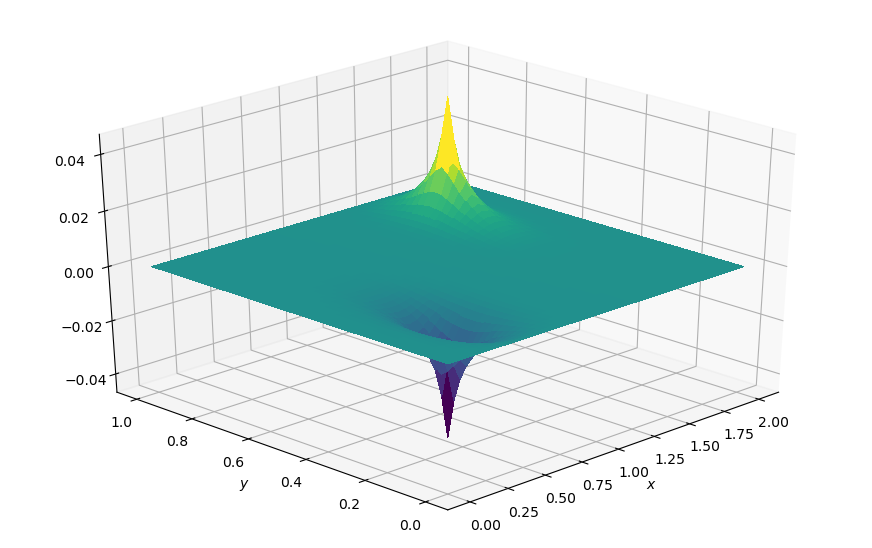

In [5]:
plot2D(x, y, p)

Ah! As maravilhas da reutilização de código! Agora, você provavelmente pensa: "Bem, se eu escrevi essa pequena função interessante que faz algo tão útil, quero usá-la repetidamente. Como posso fazer isso sem copiar e colar todas as vezes?" - Se você estiver muito curioso sobre isso, precisará aprender sobre **Pacotes** (_packaging_). Mas isso vai além do escopo de nossas lições sobre CFD. Você precisará pesquisar no Google se quiser realmente saber.

Material Complementar
-----
***

Para saber mais sobre o papel da equação de Poisson no CFD, assista ao **Video Lesson 11** no YouTube:

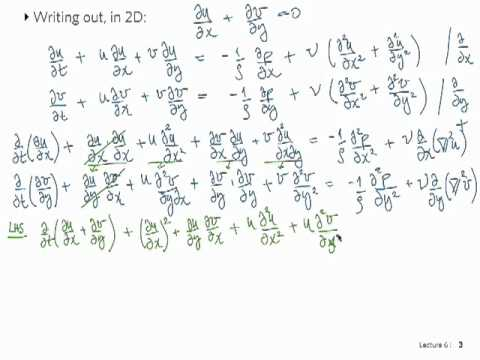

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZjfxA3qq2Lg')

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).